# Weather-Related Disease Model Evaluation

## Setup & Import

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="darkgrid")

## Load Model & Data

In [4]:
# load the models
rf_model = joblib.load("../models/rf_model.pkl") # load Random Forest model
xgb_model = joblib.load("../models/xgb_model.pkl") # load XGBoost model
# load the test data
X_test = joblib.load("../models/X_test.pkl") # load X_test data
y_test = joblib.load("../models/y_test.pkl")# load y_test data

## Random Forest Model Evaluation

In [5]:
y_pred = rf_model.predict(X_test) # make predictions

print("\n Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.91      0.98      0.94        59
           2       0.98      0.98      0.98        58
           3       1.00      1.00      1.00        68
           4       1.00      0.99      1.00       192
           5       0.97      1.00      0.99        71
           6       0.99      0.96      0.97       136
           7       1.00      0.98      0.99        61
           8       0.98      1.00      0.99       201
           9       1.00      1.00      1.00        57
          10       0.99      0.95      0.97        79

    accuracy                           0.99      1040
   macro avg       0.98      0.99      0.98      1040
weighted avg       0.99      0.99      0.99      1040


Accuracy Score: 0.9855769230769231


### Confusion Matrix - Random Forest 

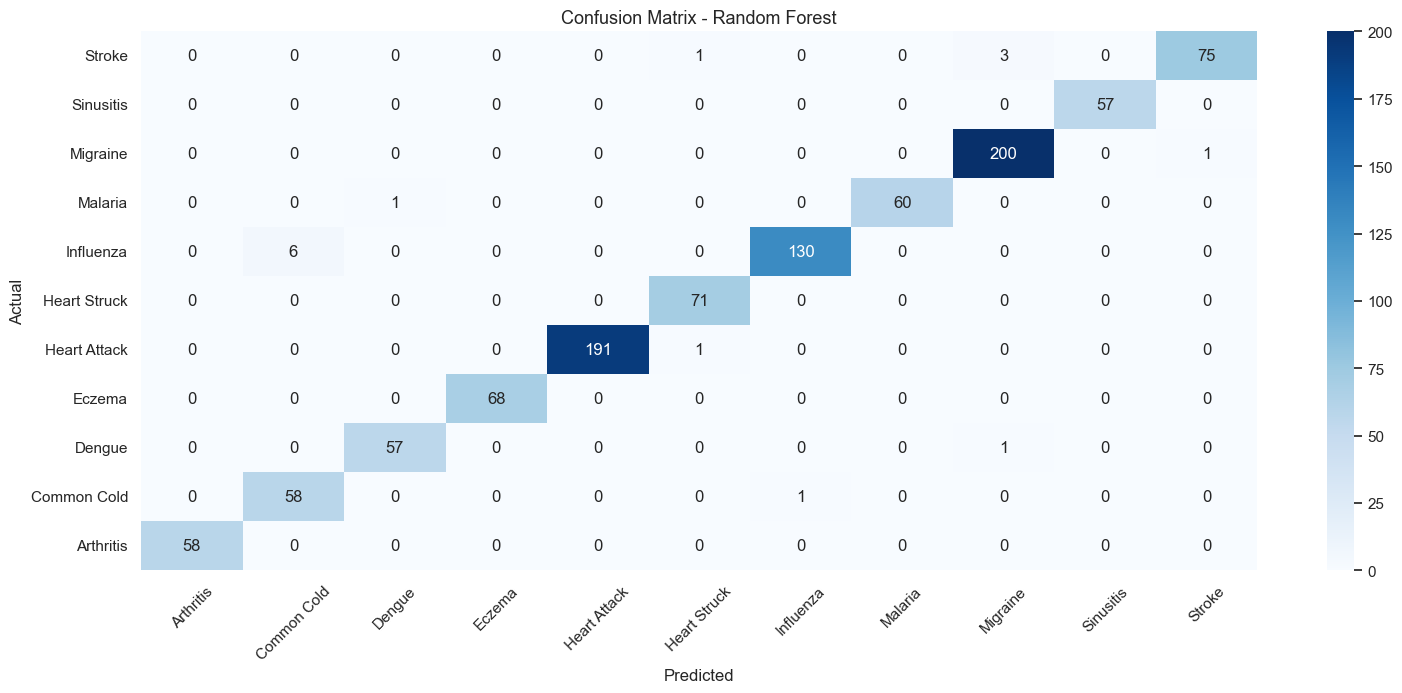

In [6]:
cm = confusion_matrix(y_test, y_pred)
model_classes = np.array(['Arthritis', 'Common Cold', 'Dengue', 'Eczema', 'Heart Attack', 
                             'Heart Struck', 'Influenza', 'Malaria', 'Migraine', 'Sinusitis', 'Stroke']) # set class names

plt.figure(figsize=(18,7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# change the ticks to show the class names
plt.xticks(ticks=np.arange(len(model_classes)) + 0.5, labels=model_classes, rotation=45)
plt.yticks(ticks=np.arange(len(model_classes)) + 0.5, labels=model_classes, rotation=0)
plt.gca().invert_yaxis()  # invert y-axis to have the first class on top
plt.gca().set_xticks(np.arange(len(model_classes)) + 0.5, minor=True) # set minor ticks for x-axis

plt.show()

### Feature Importance - Random Forest

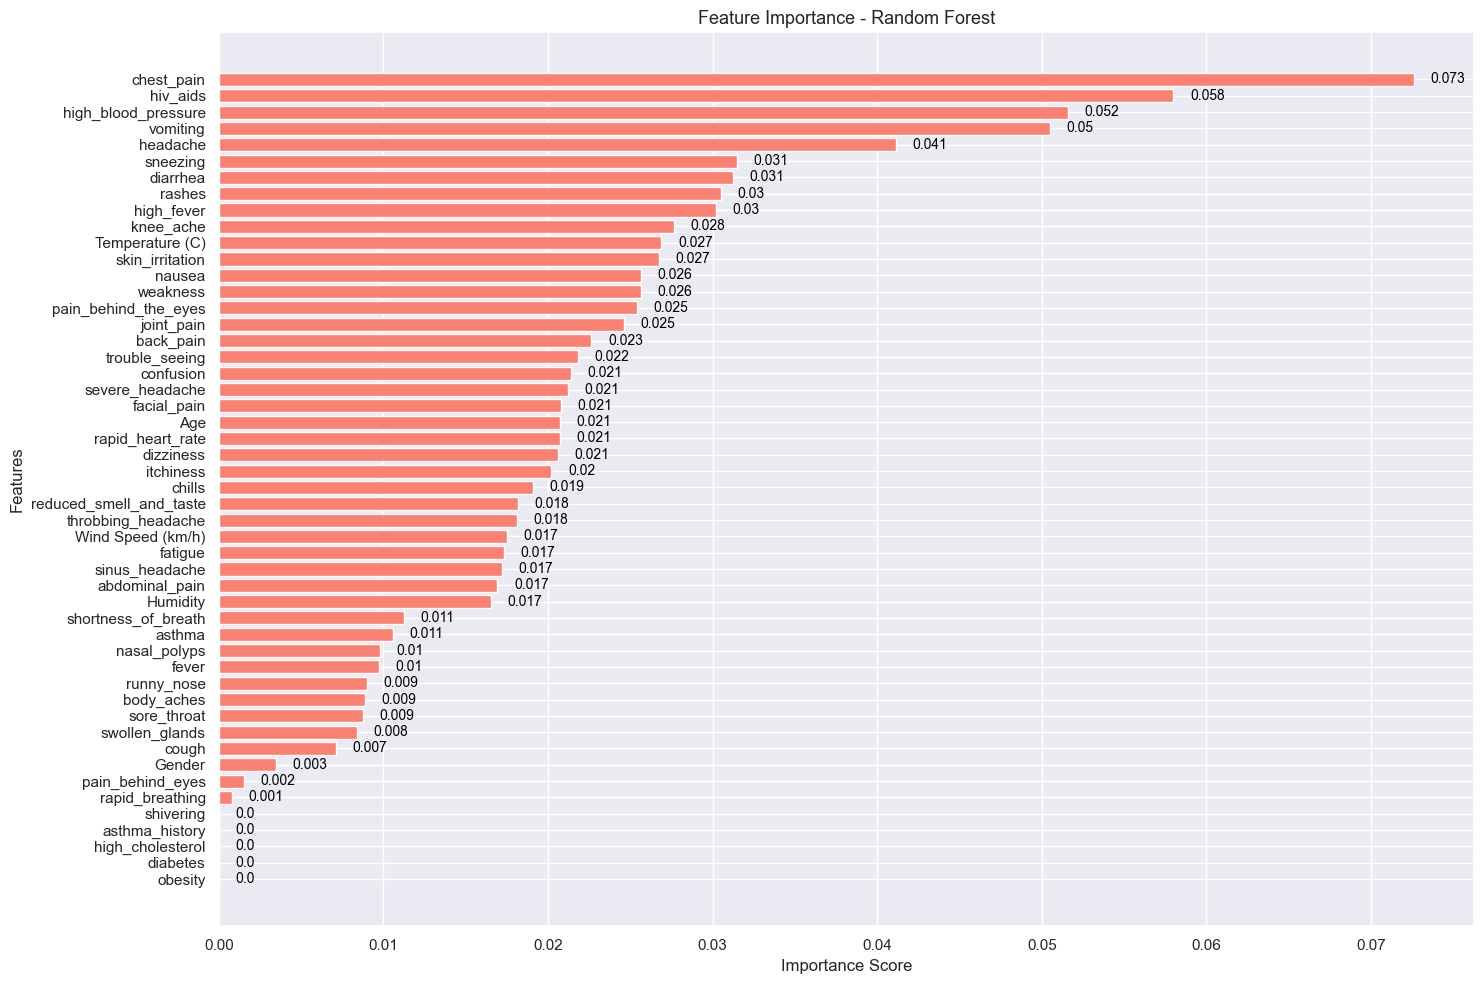

In [19]:
# make feature importance plot for Random Forest model
rf_importance = rf_model.feature_importances_

xgb_importance = pd.Series(rf_importance, index=X_test.columns).sort_values(ascending=True)
plt.figure(figsize=(15, 10))

plt.title("Feature Importance - Random Forest", fontsize=13)
plt.barh(xgb_importance.index, xgb_importance.values, color='salmon')

# adding labels on each bar
for i, v in enumerate(xgb_importance.values):
    plt.text(v + 0.001, i, str(round(v, 3)), color='black', va='center', fontsize=10)

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## XGBoost Model Evaluation

In [8]:
y_pred = xgb_model.predict(X_test) # make predictions

print("\n XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.91      0.98      0.94        59
           2       0.98      0.98      0.98        58
           3       1.00      1.00      1.00        68
           4       1.00      0.99      0.99       192
           5       0.97      1.00      0.99        71
           6       0.98      0.96      0.97       136
           7       1.00      0.98      0.99        61
           8       0.98      1.00      0.99       201
           9       1.00      1.00      1.00        57
          10       0.99      0.95      0.97        79

    accuracy                           0.98      1040
   macro avg       0.98      0.99      0.98      1040
weighted avg       0.99      0.98      0.98      1040


Accuracy Score: 0.9846153846153847


### Confusion Matrix - Random Forest

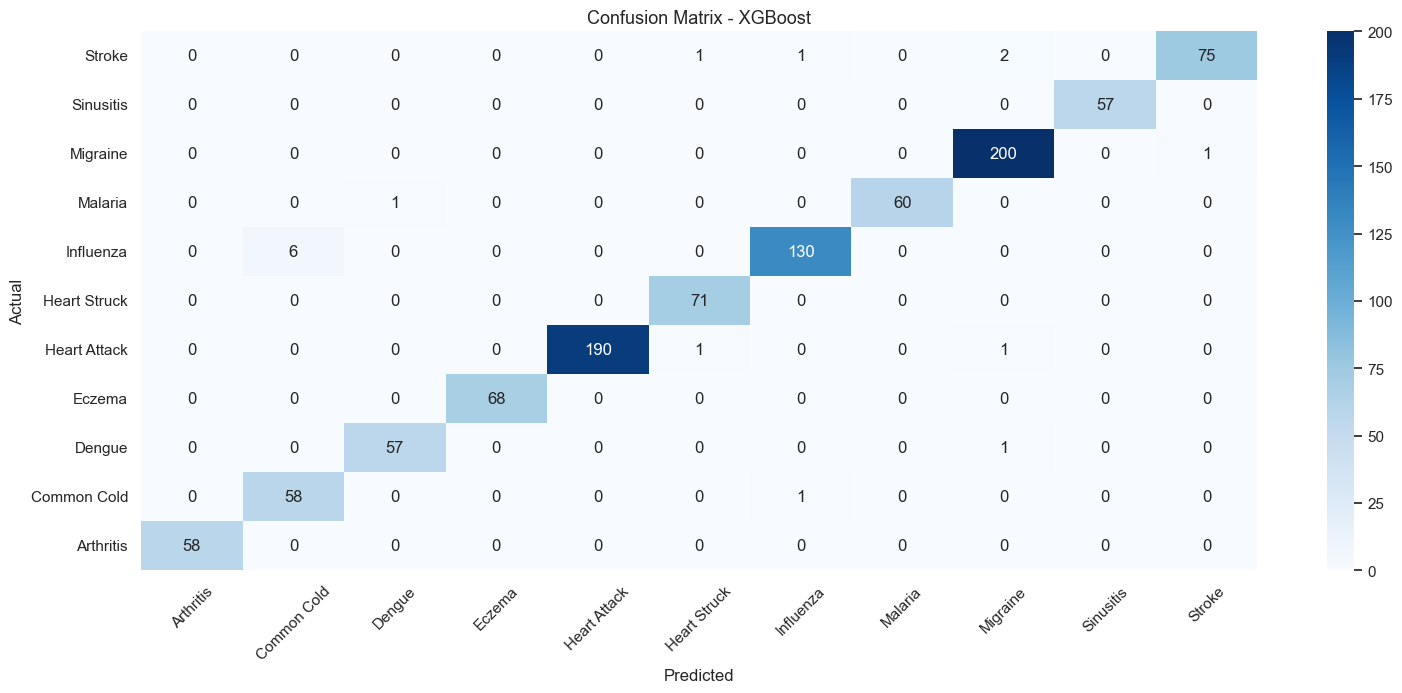

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(18,7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# change the ticks to show the class names
plt.xticks(ticks=np.arange(len(model_classes)) + 0.5, labels=model_classes, rotation=45)
plt.yticks(ticks=np.arange(len(model_classes)) + 0.5, labels=model_classes, rotation=0)
plt.gca().invert_yaxis()  # invert y-axis to have the first class on top
plt.gca().set_xticks(np.arange(len(model_classes)) + 0.5, minor=True)

plt.show()

### Feature Importance - XGBoost

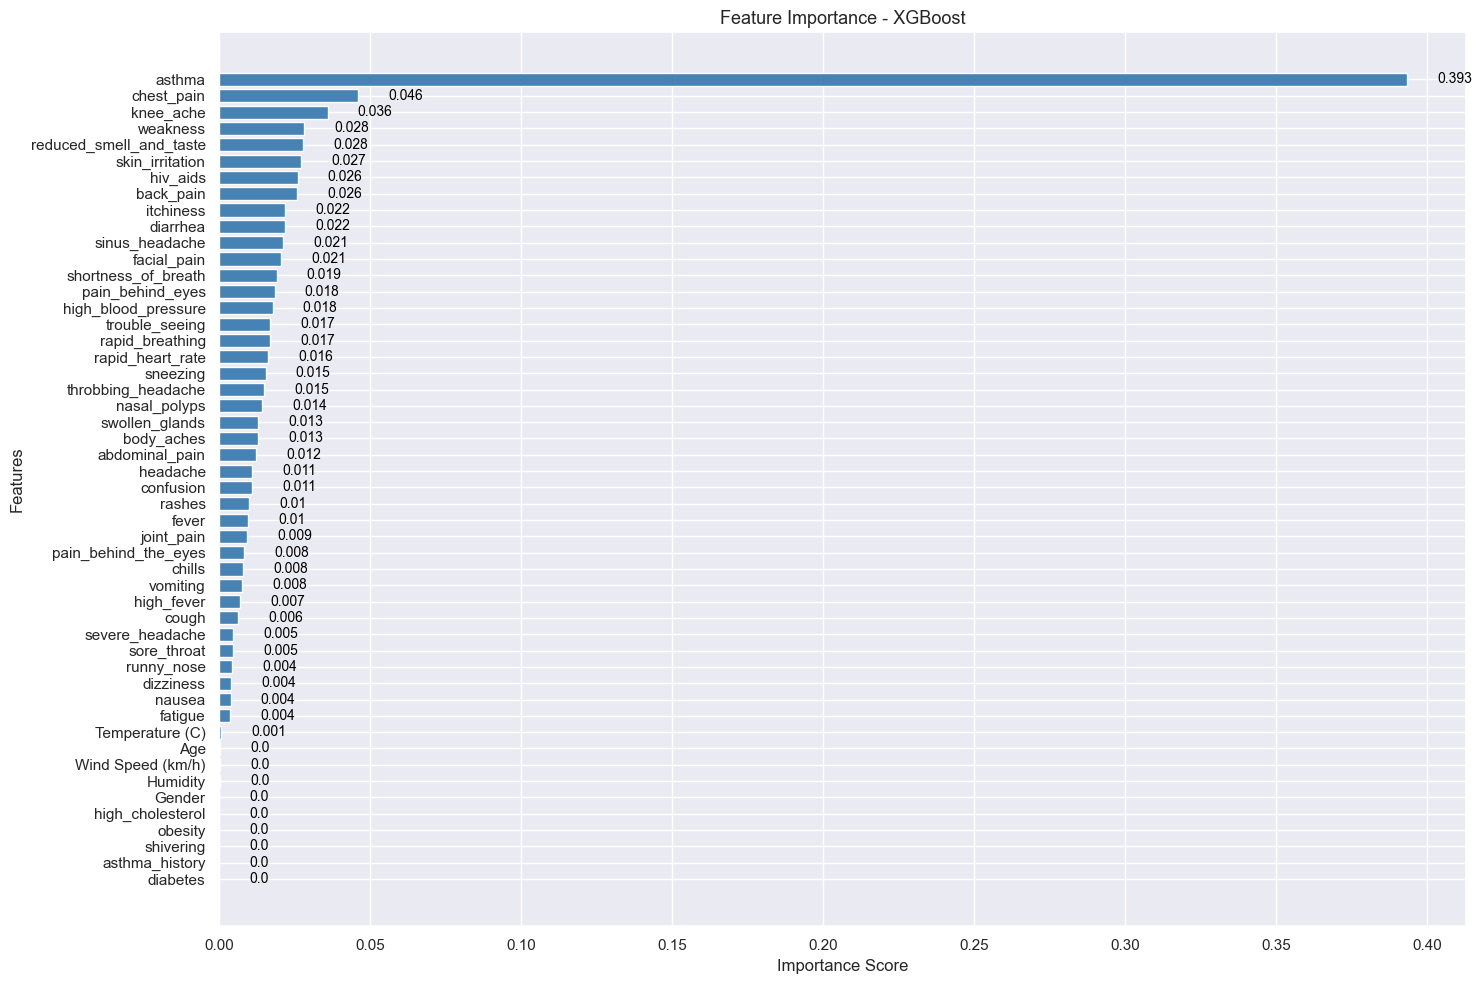

In [10]:
# make feature importance plot for XGBoost model
xgb_importance = xgb_model.feature_importances_

xgb_importance = pd.Series(xgb_importance, index=X_test.columns).sort_values(ascending=True)
plt.figure(figsize=(15, 10))

plt.title("Feature Importance - XGBoost", fontsize=13)
plt.barh(xgb_importance.index, xgb_importance.values, color='steelblue')

# adding labels on each bar
for i, v in enumerate(xgb_importance.values):
    plt.text(v + 0.01, i, str(round(v, 3)), color='black', va='center', fontsize=10)

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()